<h1>Linear Regression-Consumer confidence index for a specific bank</h1>
<p>This notebook provides an example code of analyzing <b>Consumer confidence index</b> for customers of a specific bank using linear regression. The dependent variable which we will use in OLS model is <b>Consumer confidence index</b>. We would like to understand what variables have significant relationship with consumers' confidence.
    
The general sequence of steps that we will follow is the following:
<ol>
<li>Describing the data (checking for NAs, outliers,summary statistics of our variables, etc)
<li>Checking for correlations between the variables, and drop one of correlated variables 
<li>Visualize the relationship between dependent variable (consumer conf. index) and some of variables which are highly correlated to consumer conf. index
<li>Run OLS using statsmodel package
<li>Get summary of the model
<li>Interpret the results
    <li><b>Model diagnostics</b>
<li><b>Training, testing</b>
</ol>
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
import statsmodels.stats as sms #for BP test
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import shapiro
from sklearn.metrics import r2_score

# Description of Data

In [2]:
#read the data
data=pd.read_csv("bank_1.csv")

In [3]:
#lets see how the data looks 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed,term_deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,41.8,4.962,5228.1,no
3,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,42.0,4.191,5195.8,no
4,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,37.5,0.884,4963.6,no


In [4]:
#let's check for NA's
data.isnull().values.any()

False

In [5]:
#let's get info about all the variables and the types of them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 21 columns):
age               3235 non-null int64
job               3235 non-null object
marital           3235 non-null object
education         3235 non-null object
default           3235 non-null object
housing           3235 non-null object
loan              3235 non-null object
contact           3235 non-null object
month             3235 non-null object
day_of_week       3235 non-null object
duration          3235 non-null int64
campaign          3235 non-null int64
pdays             3235 non-null int64
previous          3235 non-null int64
poutcome          3235 non-null object
emp_var_rate      3235 non-null float64
cons_price_idx    3235 non-null float64
cons_conf_idx2    3235 non-null float64
euribor3m         3235 non-null float64
nr_employed       3235 non-null float64
term_deposit      3235 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 530.8+ KB


In [6]:
#Getting summary statistics of numeric variables
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed
count,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000
mean,39.311901,259.800927,2.509428,952.026584,0.212056,-0.061206,93.531650,40.558887,3.466875,5160.250974
std,10.303260,262.956331,2.585368,210.859618,0.572653,1.604765,0.587567,4.755493,1.777472,76.953731
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,26.900000,0.635000,4963.600000
25%,31.500000,105.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,36.400000,1.313000,5099.100000
50%,37.000000,182.000000,2.000000,999.000000,0.000000,1.100000,93.444000,41.800000,4.856000,5191.000000
75%,46.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,42.700000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,50.800000,5.045000,5228.100000


In [7]:
#let's separate numeric and object variables
data_numeric = data.select_dtypes(exclude=["object"])
data_object = data.select_dtypes(include=["object"])

In [8]:
#let's see categories and number of observations in each category for object variables
for i in data_object.columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

job 
 admin.           876
technician       591
blue-collar      579
services         288
management       277
self-employed    130
retired          124
entrepreneur     111
unemployed        90
housemaid         78
student           70
unknown           21
Name: job, dtype: int64 
 

--------------------
marital 
 married     1867
single       996
divorced     362
unknown       10
Name: marital, dtype: int64 
 

--------------------
education 
 university.degree      1114
high.school             732
professional.course     456
basic.9y                412
basic.4y                251
basic.6y                151
unknown                 118
illiterate                1
Name: education, dtype: int64 
 

--------------------
default 
 no     3234
yes       1
Name: default, dtype: int64 
 

--------------------
housing 
 yes    1761
no     1474
Name: housing, dtype: int64 
 

--------------------
loan 
 no     2703
yes     532
Name: loan, dtype: int64 
 

--------------------
contact 
 cellul

In [9]:
#let's check variables with zero variance(i.e. we have same values for all observations), 
#if there is any we will not include in our further analysis
data_numeric.var()==0

age               False
duration          False
campaign          False
pdays             False
previous          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx2    False
euribor3m         False
nr_employed       False
dtype: bool

In [10]:
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed
age,1.000000,0.045538,-0.029682,-0.052030,0.057965,-0.054194,-0.035078,-0.090193,-0.045302,-0.065456
duration,0.045538,1.000000,-0.079506,-0.049401,0.024897,-0.026449,0.021763,0.036209,-0.028623,-0.040999
campaign,-0.029682,-0.079506,1.000000,0.059174,-0.090114,0.187081,0.147280,-0.015909,0.169425,0.166415
pdays,-0.052030,-0.049401,0.059174,1.000000,-0.593919,0.273313,0.051777,0.105049,0.306111,0.384571
previous,0.057965,0.024897,-0.090114,-0.593919,1.000000,-0.396073,-0.135186,0.026082,-0.442465,-0.500932
emp_var_rate,-0.054194,-0.026449,0.187081,0.273313,-0.396073,1.000000,0.741836,-0.147191,0.967303,0.890301
cons_price_idx,-0.035078,0.021763,0.147280,0.051777,-0.135186,0.741836,1.000000,-0.000698,0.630503,0.433317
cons_conf_idx2,-0.090193,0.036209,-0.015909,0.105049,0.026082,-0.147191,-0.000698,1.000000,-0.234345,-0.077489
euribor3m,-0.045302,-0.028623,0.169425,0.306111,-0.442465,0.967303,0.630503,-0.234345,1.000000,0.942567
nr_employed,-0.065456,-0.040999,0.166415,0.384571,-0.500932,0.890301,0.433317,-0.077489,0.942567,1.000000


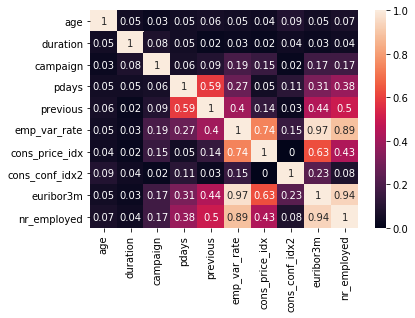

In [11]:
sns.heatmap(data.corr().abs().round(2), annot=True)

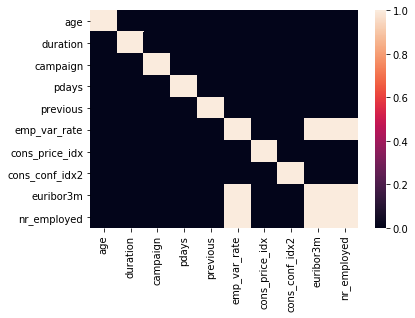

In [12]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
sns.heatmap(data_numeric.corr().abs()>=0.75)

In [13]:
#let's remove one of the following variables "nr_employed" as it is highly correlated with two variables: "euribor3m" and "emp_var_rate"
del data_numeric["nr_employed"]

In [14]:
del data_numeric["euribor3m"]

# OLS Method

In [15]:
#after making necessary changes in numeric and object datasets(in our example no change was needed), 
#we will combine back the datasets
data_new=data_numeric.join(data_object,how='outer')

In [16]:
var=data_new.columns.tolist()
var

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx2',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'term_deposit']

In [17]:
del var[7]

In [18]:
#as there are many variables, not to input all manually let's create formula 
formula="+".join(var)
formula='cons_conf_idx2~'+formula
formula

'cons_conf_idx2~age+duration+campaign+pdays+previous+emp_var_rate+cons_price_idx+job+marital+education+default+housing+loan+contact+month+day_of_week+poutcome+term_deposit'

In [19]:
#first let's include all the explaining variables in the model(high correlated ones are already excluded)
model_ols1=ols(formula=formula, data=data_new)

In [20]:
results=model_ols1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cons_conf_idx2   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     83.39
Date:                Sat, 06 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:28:13   Log-Likelihood:                -8317.9
No. Observations:                3235   AIC:                         1.673e+04
Df Residuals:                    3186   BIC:                         1.703e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -153.2136     20.516     -7.468      0.000    -193.440    -112.987
job[T.blue-collar]                   0.3286      0.218      1.510      0.131      -0.098       0.755
job[T.entrepreneur]                 -0.3158      0.328     -0.963      0.336      -0.959       0.328
job[T.housemaid]                    -0.0660      0.395     -0.167      0.867      -0.839       0.708
job[T.management]                    0.1265      0.226      0.559      0.576      -0.317       0.570
job[T.retired]                      -0.8987      0.354     -2.540      0.011      -1.593      -0.205
job[T.self-employed]                -0.1943      0.304     -0.639      0.523      -0.790       0.402
job[T.services]                      0.0338      0.233      0.145      0.884      -0.422       0.490
job[T.student]                      -0.6232      0.426     -1.462      0.144      -1.459       0.213
job[T.technician]                   -0.0095      0.191     -0.050      0.960      -0.385       0.366
job[T.unemployed]                    0.4068      0.362      1.124      0.261      -0.303       1.116
job[T.unknown]                      -1.0521      0.719     -1.463      0.144      -2.462       0.358
marital[T.married]                   0.0496      0.186      0.267      0.789      -0.314       0.414
marital[T.single]                    0.1874      0.212      0.884      0.377      -0.228       0.603
marital[T.unknown]                  -0.7419      1.028     -0.722      0.470      -2.757       1.273
education[T.basic.6y]                0.2333      0.336      0.694      0.488      -0.426       0.892
education[T.basic.9y]               -0.0460      0.266     -0.173      0.863      -0.567       0.475
education[T.high.school]            -0.2085      0.265     -0.788      0.431      -0.727       0.310
education[T.illiterate]             -2.8530      3.228     -0.884      0.377      -9.182       3.475
education[T.professional.course]    -0.4211      0.286     -1.472      0.141      -0.982       0.140
education[T.university.degree]      -0.5354      0.264     -2.027      0.043      -1.053      -0.017
education[T.unknown]                -1.2067      0.371     -3.251      0.001      -1.934      -0.479
default[T.yes]                      -0.3543      3.222     -0.110      0.912      -6.672       5.963
housing[T.yes]                       0.3321      0.114      2.910      0.004       0.108       0.556
loan[T.yes]                          0.0146      0.152      0.096      0.924      -0.284       0.314
contact[T.telephone]                -5.6092      0.184    -30.431      0.000      -5.971      -5.248
month[T.aug]                       -10.3047      0.338    -30.516      0.000     -10.967      -9.643
month[T.dec]                       -11.0336      0.73

# Model diagnostics

<h2> Cecking for Linearity and Equal variance</h2>

Residuals of the model will be used to test for linearity and for other assumptions as well.

1. Both linearity and equal variance can be tested by plotting residuals vs. predictions (residuals are prediction errors)
2. We will use <b>Harvey collier</b> test for linearity
3. <b>Breusch-Pagan</b> test for homoscedasticity


In [21]:
#residuals of the model
residuals=results.resid
residuals.head(10)

0    1.846690
1   -2.855660
2    0.829266
3   -0.088590
4   -0.707879
5   -0.967385
6    0.334675
7   -0.401288
8   -2.509853
9    0.265323
dtype: float64

In [22]:
#let's actually get residual values
#first, we need to get predicted values from the results of the model
#second, we should calculate the difference between predicted and true values of cons. conf. index
pred_values=results.predict()
true_values=data_new.cons_conf_idx2
resid=true_values-pred_values

In [23]:
#we can see that we got the same results
resid.head(10)

0    1.846690
1   -2.855660
2    0.829266
3   -0.088590
4   -0.707879
5   -0.967385
6    0.334675
7   -0.401288
8   -2.509853
9    0.265323
Name: cons_conf_idx2, dtype: float64

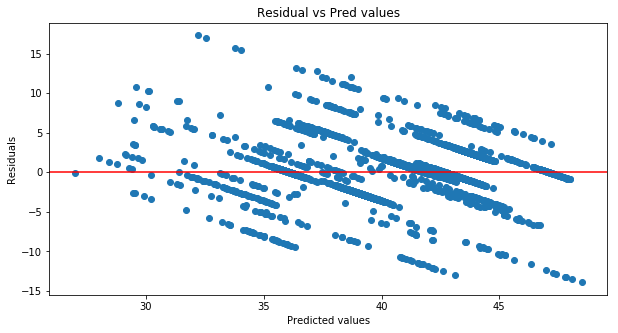

In [24]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [25]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
#Small p-value shows that there is violation of homoscedasticity
sms.diagnostic.het_breuschpagan(residuals,model_ols1.exog)

(1542.8335255627721, 9.688101520449531e-292, 60.517435374250965, 0.0)

<h2>Normality</h2>

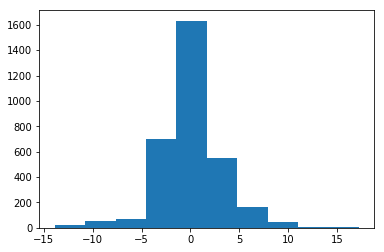

In [26]:
#visual presentation- histogram
plt.hist(residuals)
plt.show()

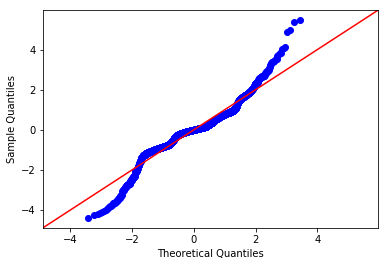

In [27]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

<b>Jarque-Bera normality test values are given in the model summary above. From where we could conclude that normality was violated. However, let's run another test of normality: Shapiro-Wilk test.</b>


In [28]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
#We reject the Null hypothesis which means that we can state with 95% confidence that our data is not normal
stat,p = shapiro(residuals)
print(stat,p)

0.9370357990264893 5.377484874716274e-35


# Training, Testing

In [29]:
train,test=train_test_split(data_new,test_size=0.25,random_state=42)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 2770 to 3174
Data columns (total 19 columns):
age               2426 non-null int64
duration          2426 non-null int64
campaign          2426 non-null int64
pdays             2426 non-null int64
previous          2426 non-null int64
emp_var_rate      2426 non-null float64
cons_price_idx    2426 non-null float64
cons_conf_idx2    2426 non-null float64
job               2426 non-null object
marital           2426 non-null object
education         2426 non-null object
default           2426 non-null object
housing           2426 non-null object
loan              2426 non-null object
contact           2426 non-null object
month             2426 non-null object
day_of_week       2426 non-null object
poutcome          2426 non-null object
term_deposit      2426 non-null object
dtypes: float64(3), int64(5), object(11)
memory usage: 379.1+ KB


In [31]:
#train
model_linear=ols(formula=formula, data=train).fit()

In [32]:
#test
prediction=model_linear.predict(test)

In [33]:
prediction.head()

1334    39.499125
1756    38.567420
3031    35.745921
321     43.253611
2517    42.885023
dtype: float64

In [34]:
#let's calculate R^2
r2_sc=r2_score(test.cons_conf_idx2,prediction)
print(r2_sc)

0.5714610019674364
